# Project Plan from GPT

Load the data
Load the CSV file into a pandas DataFrame.
Understand the data
Display the structure, data types, and summary statistics.
Identify missing or incorrect values.
Clean the data
Handle missing values and remove or correct anomalies.
Explore the data
Visualize relationships using plots.
Check distributions and correlations.
Feature selection
Identify the most relevant features for predicting the target variable.
Normalize/scale the data
Standardize or normalize features to improve the performance of KNN.
Train-test split
Divide the dataset into training and testing subsets.
Train the KNN model
Train a KNN classifier using the training data.
Validate the model
Evaluate the model using accuracy, precision, recall, F1-score, and a confusion matrix.
Interpret the results
Discuss the results and their implications in real-world applications.


The dataset contains the following columns:

1.Age: Age of the person (numerical).
Sex: Gender of the person (categorical: M/F).
ChestPainType: Type of chest pain (categorical: ATA, NAP, ASY, etc.).
RestingBP: Resting blood pressure (numerical).
Cholesterol: Serum cholesterol (numerical).
FastingBS: Fasting blood sugar > 120 mg/dl (binary: 0/1).
RestingECG: Resting electrocardiographic results (categorical: Normal, ST, etc.).
MaxHR: Maximum heart rate achieved (numerical).
ExerciseAngina: Exercise-induced angina (binary: Y/N).
Oldpeak: Depression induced by exercise relative to rest (numerical).
ST_Slope: Slope of the peak exercise ST segment (categorical: Up, Flat, Down).
HeartDisease: Target variable (binary: 0 = no disease, 1 = disease).

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Load the dataset directly from GitHub
file_url = "https://raw.githubusercontent.com/ascrivs/gptfileaccess/main/heart_disease_prediction.csv"
data = pd.read_csv(file_url)

# Data Cleaning
data['RestingBP'] = data['RestingBP'].replace(0, np.nan)
data['Cholesterol'] = data['Cholesterol'].replace(0, np.nan)
data['RestingBP'] = data['RestingBP'].fillna(data['RestingBP'].median())
data['Cholesterol'] = data['Cholesterol'].fillna(data['Cholesterol'].median())

# Scale numerical features
scaler = MinMaxScaler()
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# One-Hot Encoding for categorical variables
data_encoded = pd.get_dummies(
    data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True
)

# Define features and target
X = data_encoded.drop(columns=['HeartDisease'])
y = data_encoded['HeartDisease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Hyperparameter Tuning with GridSearchCV
param_grid = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameter and score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best k: {best_k}, Best Cross-Validation Accuracy: {best_score}")


Best k: 19, Best Cross-Validation Accuracy: 0.8514397539837854


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train the KNN model with k=19
knn_best = KNeighborsClassifier(n_neighbors=19)
knn_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_best.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.842391304347826
Precision: 0.8543689320388349
Recall: 0.8627450980392157
F1-Score: 0.8585365853658536
Confusion Matrix:
[[67 15]
 [14 88]]


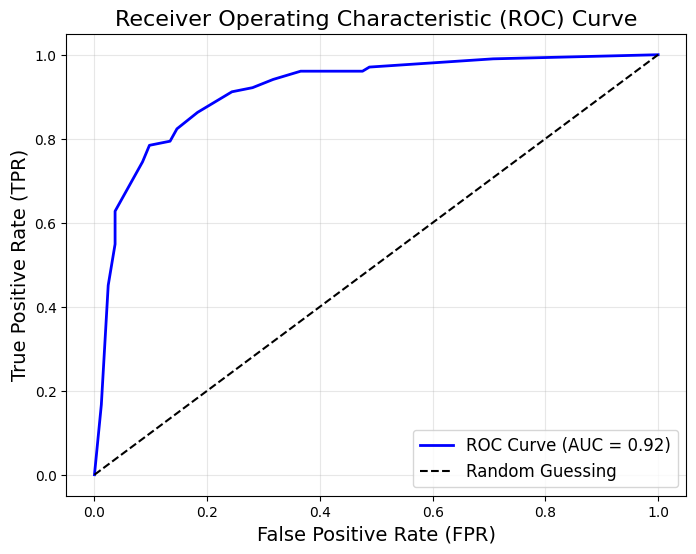

AUC: 0.915052606408417


In [3]:
# Get the predicted probabilities for the positive class
y_prob = knn_best.predict_proba(X_test)[:, 1]

# Calculate the FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

print(f"AUC: {auc}")

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score

# Initialize lists to store precision, recall, and thresholds
precisions = []
recalls = []
specific_thresholds = []

# Iterate through different thresholds
for threshold in np.arange(0.0, 1.1, 0.1):
    y_pred_threshold = (y_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    
    precisions.append(precision)
    recalls.append(recall)
    specific_thresholds.append(threshold)

# Combine results into a DataFrame for better visualization
threshold_df = pd.DataFrame({
    'Threshold': specific_thresholds,
    'Precision': precisions,
    'Recall': recalls
})

print(threshold_df)


    Threshold  Precision    Recall
0         0.0   0.554348  1.000000
1         0.1   0.712230  0.970588
2         0.2   0.742424  0.960784
3         0.3   0.765625  0.960784
4         0.4   0.803419  0.921569
5         0.5   0.854369  0.862745
6         0.6   0.880435  0.794118
7         0.7   0.915663  0.745098
8         0.8   0.955224  0.627451
9         0.9   0.958333  0.450980
10        1.0   0.944444  0.166667


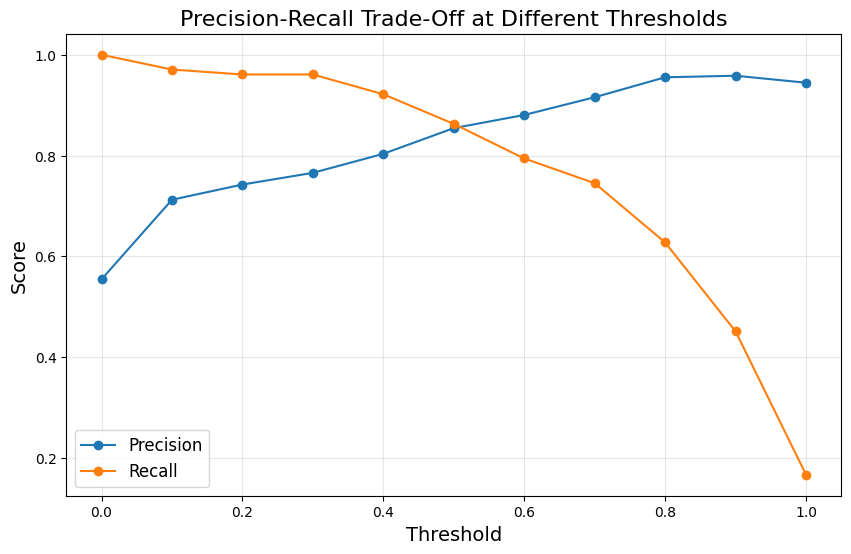

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(threshold_df['Threshold'], threshold_df['Precision'], label='Precision', marker='o')
plt.plot(threshold_df['Threshold'], threshold_df['Recall'], label='Recall', marker='o')
plt.title('Precision-Recall Trade-Off at Different Thresholds', fontsize=16)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [6]:
# Reclassify predictions using threshold = 0.7
threshold = 0.7
y_pred_new_threshold = (y_prob >= threshold).astype(int)

# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_new_threshold)
precision = precision_score(y_test, y_pred_new_threshold)
recall = recall_score(y_test, y_pred_new_threshold)
f1 = f1_score(y_test, y_pred_new_threshold)
conf_matrix = confusion_matrix(y_test, y_pred_new_threshold)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.8206521739130435
Precision: 0.9156626506024096
Recall: 0.7450980392156863
F1-Score: 0.8216216216216217
Confusion Matrix:
[[75  7]
 [26 76]]


We see a reduction in accuracy but an increase in precision because of the prioritization of fewer false positives. 

Precision is quite high at ~91.6%
- Of all patients predicted to have heart disease 91.6% actually do.

Recall is ~74.5 which means of all patients with heart disease, we accurately predicted 74.5% of them.



### **Heart Disease Prediction Using K-Nearest Neighbors**

# **1. Introduction**
# This project aims to predict heart disease using the K-Nearest Neighbors (KNN) algorithm. The goal is to identify how threshold adjustments impact the balance between recall (capturing true positive cases) and precision (minimizing false positives), providing insights into real-world applications in healthcare.


In [ ]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt

# **3. Load and Preview the Dataset**
file_url = "https://raw.githubusercontent.com/ascrivs/gptfileaccess/main/heart_disease_prediction.csv"
data = pd.read_csv(file_url)
data.head()

# **4. Data Cleaning**
# Replace 0 values with NaN in "RestingBP" and "Cholesterol" and fill with median values.
data['RestingBP'] = data['RestingBP'].replace(0, np.nan)
data['Cholesterol'] = data['Cholesterol'].replace(0, np.nan)
data['RestingBP'] = data['RestingBP'].fillna(data['RestingBP'].median())
data['Cholesterol'] = data['Cholesterol'].fillna(data['Cholesterol'].median())





**5. Data Preprocessing**

In [ ]:

# Scale numerical features and one-hot encode categorical features.
scaler = MinMaxScaler()
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
data_encoded = pd.get_dummies(
    data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True
)

 **6. Define Features and Target**

In [ ]:

X = data_encoded.drop(columns=['HeartDisease'])
y = data_encoded['HeartDisease']




**7. Train-Test Split**




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



**8. Hyperparameter Tuning for KNN**

In [ ]:

param_grid = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
print(f"Best k: {best_k}, Best Cross-Validation Accuracy: {best_score}")

**9. Train Model with Optimal k**

In [ ]:

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)


**10. Evaluate on Test Set (Default Threshold = 0.5)**

In [ ]:

y_prob = knn_best.predict_proba(X_test)[:, 1]
y_pred_default = (y_prob >= 0.5).astype(int)
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)
conf_matrix_default = confusion_matrix(y_test, y_pred_default)

print("Default Threshold (0.5):")
print(f"Accuracy: {accuracy_default}")
print(f"Precision: {precision_default}")
print(f"Recall: {recall_default}")
print(f"F1-Score: {f1_default}")
print(f"Confusion Matrix:\n{conf_matrix_default}")



# **11. Adjust Threshold to 0.7 and Re-Evaluate**

In [ ]:
threshold = 0.7
y_pred_threshold = (y_prob >= threshold).astype(int)
accuracy_threshold = accuracy_score(y_test, y_pred_threshold)
precision_threshold = precision_score(y_test, y_pred_threshold)
recall_threshold = recall_score(y_test, y_pred_threshold)
f1_threshold = f1_score(y_test, y_pred_threshold)
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)

print("Threshold = 0.7:")
print(f"Accuracy: {accuracy_threshold}")
print(f"Precision: {precision_threshold}")
print(f"Recall: {recall_threshold}")
print(f"F1-Score: {f1_threshold}")
print(f"Confusion Matrix:\n{conf_matrix_threshold}")


**12. Plot Precision-Recall Trade-Off**


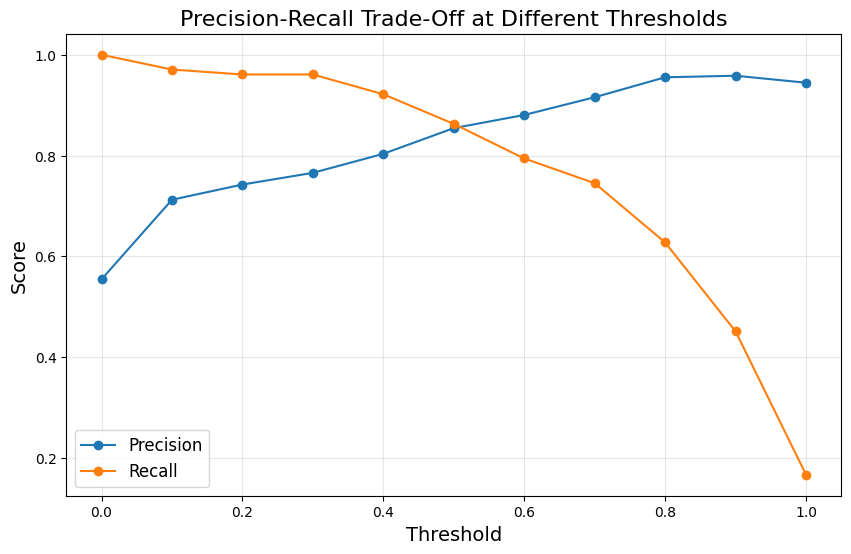

In [10]:
precisions, recalls, thresholds = [], [], []
for threshold in np.arange(0.0, 1.1, 0.1):
    y_pred = (y_prob >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    thresholds.append(threshold)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision", marker="o")
plt.plot(thresholds, recalls, label="Recall", marker="o")
plt.title("Precision-Recall Trade-Off at Different Thresholds", fontsize=16)
plt.xlabel("Threshold", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


 **Plot ROC Curve**

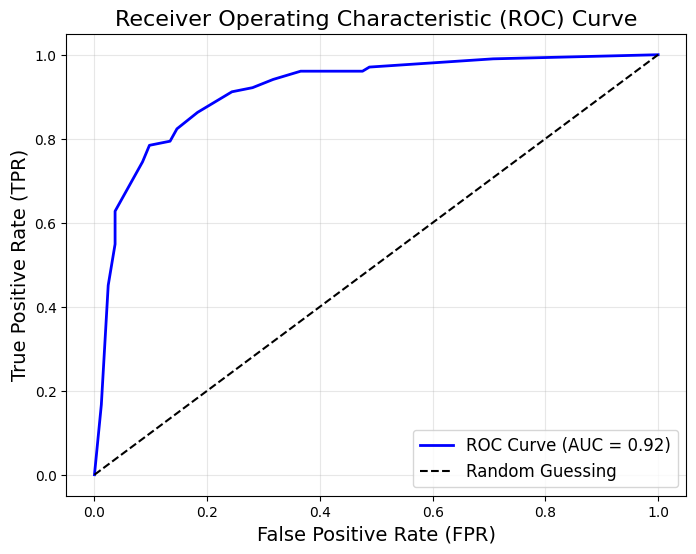

In [11]:


fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()



## **14. Recommendations**
Based on the analysis:
- A threshold of `0.7` provides high precision (~91.6%) but sacrifices recall (~74.5%).
- For critical healthcare applications where missing positive cases is unacceptable, consider a lower threshold (~0.5-0.6) to improve recall.
- The choice of threshold should align with the real-world use case (e.g., prioritizing recall for patient safety or precision for cost management).
